<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Introduction to Bioinformatics
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Dr. Sharifi-Zarchi
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

Sequencing_File_Analysis.ipynb


In [ ]:
cd '/content/drive/MyDrive/Intro_to_Bioinformatics'

/content/drive/MyDrive/Intro_to_Bioinformatics


**Student Name: Sina Daneshgar**

**Student ID: 401100369**

# Exploring SRR12506197: Understanding Sequencing File Formats and Extracting Information

In this analysis, we are working with a sequencing data file identified as **SRR12506197**. Our objective is to gain a deeper understanding of the sequencing file format and explore the types of information we can extract from it. Through this file, we will analyze data quality, sequence orientation, and other key characteristics that are essential for bioinformatics workflows.


# Installing and Setting Up Required Tools

To work with sequencing data, we need to install a few essential bioinformatics tools:

1. **Entrez Direct**: A command-line tool from NCBI, which allows us to access NCBI databases, retrieve biological data, and perform various search operations.
2. **SRA Toolkit**: A toolkit for accessing and managing sequencing data from the Sequence Read Archive (SRA), enabling us to download and manipulate sequencing files.
3. **FastQC**: A quality control tool for high-throughput sequence data, which helps assess the quality of sequencing reads.

In this code section:
- We use shell commands to install these tools.
- We set up an environment variable to add Entrez Direct to the system's PATH, making its commands accessible for further use.


In [ ]:
!yes | sh -c "$(curl -fsSL https://ftp.ncbi.nlm.nih.gov/entrez/entrezdirect/install-edirect.sh)"
!sudo apt  -qq  update
!sudo apt  -qq  install sra-toolkit
!sudo apt  -qq  install fastqc


Entrez Direct has been successfully downloaded and installed.

In order to complete the configuration process, please execute the following:

  echo "export PATH=/root/edirect:\${PATH}" >> ${HOME}/.bashrc

or manually edit the PATH variable assignment in your .bashrc file.

Would you like to do that automatically now? [y/N]
OK, done.

To activate EDirect for this terminal session, please execute the following:

export PATH=${HOME}/edirect:${PATH}

56 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
The following additional packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu
Suggested packages:
  blends-doc menu-l10n gksu | kde-runtime | ktsuss
The following NEW packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wv

In [ ]:
import os
os.environ["PATH"] += ":/root/edirect"

# Importing Required Libraries
import the libraries needed for your analysis:

In [ ]:
#your code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Searching the SRA Database and Fetching Run Information

In this step, you’ll search the SRA (Sequence Read Archive) database for the sample **SRR12506197**. Using `esearch` and `efetch`, you will retrieve metadata about this run and save it as a CSV file named `runinfo.csv`. This file will provide basic information about the sequencing run, which will be used in the next steps.

In [ ]:
#your code
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.6 MB/s eta 0:00:00


In [ ]:
!sudo apt update
!sudo apt install -y edirect

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Fetched 384 kB in 2s (205 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
56 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as

In [ ]:
!esearch -db sra -query SRR12506197 | efetch -format runinfo > runinfo.csv

# Loading and Exploring Run Information

In this part, you’ll load the `runinfo.csv` file to explore what information it contains about the sequencing run. Follow these steps:

1. **Load the CSV File**: Use `pd.read_csv()` to load `runinfo.csv` into a DataFrame, making it easier to view and manipulate the data.
   
2. **Check Available Columns**: Print the column names to see the different types of information available in the file. This helps identify useful metadata for the sample.

3. **Select Key Fields**: Extract and print the **TaxID** and **ScientificName** columns. These fields provide the taxonomic identifier and the scientific name of the organism in the sample.

In [ ]:
#your code

run_info = pd.read_csv("runinfo.csv") #1
pd.set_option("display.max_columns", None)

print(run_info.columns) #2
print('\n')

print(run_info[['ScientificName', 'TaxID']]) #3

Index(['Run', 'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates',
       'avgLength', 'size_MB', 'AssemblyName', 'download_path', 'Experiment',
       'LibraryName', 'LibraryStrategy', 'LibrarySelection', 'LibrarySource',
       'LibraryLayout', 'InsertSize', 'InsertDev', 'Platform', 'Model',
       'SRAStudy', 'BioProject', 'Study_Pubmed_id', 'ProjectID', 'Sample',
       'BioSample', 'SampleType', 'TaxID', 'ScientificName', 'SampleName',
       'g1k_pop_code', 'source', 'g1k_analysis_group', 'Subject_ID', 'Sex',
       'Disease', 'Tumor', 'Affection_Status', 'Analyte_Type',
       'Histological_Type', 'Body_Site', 'CenterName', 'Submission',
       'dbgap_study_accession', 'Consent', 'RunHash', 'ReadHash'],
      dtype='object')


     ScientificName  TaxID
0  Escherichia coli    562


# Understanding the Taxonomic ID (TaxID)
## Question
Research and briefly explain:
- What is a Taxonomic ID (TaxID)?
- How is it used in bioinformatics or scientific research?

**Your Answer:**

> 1) It is a unique identifier (which admitted in NCBI database) for each taxon(such as a species, family, or class) which organizes and classify them as clear as possible! like all viruses, plants, animals and etc. These are numeric codes (like 562 for our example, and 9606 for humans (homo sapiens)) that allows precise referencing in biological databases. (like NCBI)

> 2)
*   **Organizes identification in Databases** (they're used in every valid database)
*   **Efficient Data Retrieval** (for example, we can filter our dataset just to rows with taxID=9606 for studying on humans!)
*   **Constructing Phylogenetic Trees** (i.e. we can build those trees for clustering and comparing genomes)
*   **Standardization in Scientific Communication** (TaxID reduce ambiguity in organism naming. Because some species has multiple synonyms!)
***




# Downloading the Sequencing Run Data

In this part, you will download the sequencing data for **SRR12506197** using two commands:

1. **prefetch**: This command retrieves the sequencing data from the SRA (Sequence Read Archive), a public repository for storing raw sequencing data.
2. **fastq-dump**: After downloading, this command extracts the data into **FASTQ** files, a common format for storing raw sequence reads along with quality scores.

## Questions
To better understand the data formats, briefly answer the following:

1. **What is the SRA format, and how is it used in bioinformatics?**
   
   > *The SRA format stands for Sequence Read Archive. It is a public repository maintained by NCBI. This format efficiently stores high-throughput sequencing data, including raw reads, metadata, and quality scores, in a compressed and standardized form.   **How it is used in Bio.**?
    * They store the DNA sequences, Reproducibility and public-access is their main power!
    * We can fetch the data from sra-toolkit and make analysis on them.
    * Researchers can share raw sequencing data with the scientific community for validation and further analysis.
*


2. **What information does a FASTQ file contain, and why is it important in sequencing data analysis?**

   > A FASTQ file is a text-based format used to store raw sequencing reads along with their associated quality scores. Each sequencing read is represented by four lines:
   * Header (@ followed by a unique identifier)
   * Sequence (like "ACTG" or "ACTAG" and etc.)
   * Separator (+ line. Optionally repeats the header, or is left as +)
   * Quality Scores (Encodes the confidence of each base call as a string of ASCII characters. For example: IIII (Phred scores mapped to ASCII)). \\
    \
    **Why is it important?** \\
    1) Good data representation! (e.g., they provide gene expression quantification) \\
    2) Quality Control (Allows researchers to trim low-quality parts of sequence) \\
    3) Reproducibility (Storing raw reads ensures that analyses can be repeated or reanalyzed using updated methods)
   
   



In [ ]:
!vdb-config --interactive

In [ ]:
!prefetch SRR12506197 #1


2024-11-18T15:11:09 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2024-11-18T15:11:09 prefetch.2.11.3: 1) Downloading 'SRR12506197'...
2024-11-18T15:11:09 prefetch.2.11.3: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2024-11-18T15:11:09 prefetch.2.11.3:  Downloading via HTTPS...
2024-11-18T15:12:37 prefetch.2.11.3:  HTTPS download succeed
2024-11-18T15:12:57 prefetch.2.11.3:  'SRR12506197' is valid
2024-11-18T15:12:58 prefetch.2.11.3: 1) 'SRR12506197' was downloaded successfully
2024-11-18T15:12:59 prefetch.2.11.3: 'SRR12506197' has 0 unresolved dependencies


In [ ]:
!fastq-dump --split-files SRR12506197

Read 275897 spots for SRR12506197
Written 275897 spots for SRR12506197


In [ ]:
!fastq-dump --split-files --gzip SRR12506197 # Optional, it just create a Zip file! (dont try at home)

Read 275897 spots for SRR12506197
Written 275897 spots for SRR12506197


In [ ]:
!head SRR12506197_1.fastq

@SRR12506197.1 1 length=4164
TATGGTGGCTTCAATCTTGCTCAGTTTTAGTGGTTCCAGCTTCGGCTGACGTTTCCTTTCCAGTCGAGGTCGCCGTTAATGGCACGGCGTAAAACCGCCTTTGCGCCTTCAACCAGTTTTTCTGTGCTTTGACTACGCCATCCACCAGACCGATTTTCAGCGCCTGATCCGCGCCGACATCTTTACCGGCGGCAATGATTTCCAGCGCACTGTCAGCGCCCAGCATACGTGGCATACGTACAGAACCGCCAAAGCGGGCATGATGCGGATTTGGTTTCCGGCAGACCGATGCGCAGATCCGGCGTCGCCAGACGATAATCCCGGTCGCCAGCACGCATTCGCAATACCGCCCAGCGCATAGCCATTGACGGCAGCAATGGTCGGCACCGGCAGATCTTCCAGGCGATTAAACGCTATTGGCAAAGTGCAGCCACTGACAACTGTTCTTCAGGAACCAGGGAACGGGGACAAAAATTCGGTGATAGCACCGACGGTAAGCTGCTTTGTTCGAACGCAGCAGCAGCCCTTTACCCAGATCTGATTGCTGTTCCAGCACGCCGATGGCCTCGCCGAGGCTGGCGACAGTCGCAGTGTCGAGTTTATTAACTGAACTGGGGCATCAAATACCAGTTCGGCAATGCCATCTTCCAGCCAGTCAGGTACAGGGTGTCGCCTTTGTAAAGCATGTCAGTCTCCTGAATCCGCAAGGTGATCTGGTCGTACCAGATGAGTCGAAGTGTGTATTTTGTGTTAAAAATATGCAAACAAAGATTAAAGAAATGCCGATCTGATCACGCTCGGCAGAAATCACGCTCTGGATGAACGATGTGCTAAGATGCGGAGACTTAAGGTCAAAAAAAAAACAGAAGGGTAAAAATGGAATCACGGCCTCGCTCTATAAAAATCATATAGCTACCTTACAAGAACGGACTCGCGATGCGCTGGCGCGCTTCAAGCTGGATGCGTTACTT

# Creating a Smaller Sample of the FASTQ File for Testing

In this step, we reduce the computational load by working with a smaller subset of the data. Here, we select the first 1000 reads from the original FASTQ file, creating a smaller file for testing purposes.

## Question
1. **What information is stored in a FASTQ file, and how is it organized?** Describe the structure of each read in terms of its four lines, including what each line represents.
   
2. **Given this structure, why do we need to select 4000 lines to get 1000 reads?**

> **I answered the first question above!!** \\
Each read is represented by 4 lines in a FASTQ file: \\
* Identifier \\
* Sequence \\
* Separator \\
* Quality scores \\
Thus, for N reads, i should gather N * 4 lines to make my analyzing looks completely perfect! (because for every read, i need all the other informations about that read)



In [ ]:
# Extract the first 1000 reads from the original FASTQ file
!head -n 4000 SRR12506197_1.fastq > SRR12506197_1_sample.fastq

# Running FastQC for Quality Control on the Sample

In this step, you will run **FastQC** on the smaller sample FASTQ file to assess the quality of the sequencing data. Running FastQC on a smaller file saves time and provides insights into data quality.

1. **Create a Folder for Output**: A folder named `fastqc_af` will be created to store the FastQC output.
2. **Run FastQC**: FastQC will analyze the sample FASTQ file and produce an HTML report summarizing the quality metrics.

## Instructions
- After running this code, you will find an HTML report in the `fastqc_af` folder. When you submit your work, please include this HTML file alongside your `.ipynb` notebook.

## Question
Open the HTML report generated by FastQC and briefly describe what you observe. You don’t need to go into full detail—just describe a few key sections or any notable observations you see in the file.

> * 1) Per Base Sequence Quality: \\
Graph showing the quality scores across all reads. \\
Green: High quality. \\
Red: Poor quality.

* 2) Per Sequence GC Content: Compares GC content across sequences to detect anomalies.

* 3) Overrepresented Sequences: Indicates adapter contamination or highly repetitive sequences.

* 4) Adapter Content: Checks for leftover sequencing adapters.

* 5) Other Observations:
  * The **Per Base Sequence Quality** box plots in a FastQC report,
summarize the quality scores of sequencing reads at each base position across all reads in the dataset.

  * The **Per Base N Content** graph shows the proportion of ambiguous base calls (N) at each base position across all reads. An N in a sequence, indicates that the sequencer could not determine the nucleotide at that position (A, T, G, or C). In our example, the line stuck in zero% (flat) and it represents that we have a good-quality dataset.*

In [ ]:
!mkdir fastqc_af #1

In [ ]:
!fastqc -o fastqc_af SRR12506197_1_sample.fastq #2

Started analysis of SRR12506197_1_sample.fastq
Approx 100% complete for SRR12506197_1_sample.fastq
Analysis complete for SRR12506197_1_sample.fastq


# Calculating and Plotting Normalized 2-mer Frequencies

In this part, you will create two functions to calculate the normalized frequency of each possible 2-mer (two-nucleotide sequence) in a DNA sequence and then plot these frequencies.

1. **2-mer Frequency Calculator**:
   - First, write a function that calculates the frequency of each of the 16 possible 2-mers (e.g., "AA," "AC," "AG," etc.) in a given sequence.
   - Normalize these counts to get the relative frequency of each 2-mer. Normalization allows you to see each 2-mer's proportion in the sequence.

2. **2-mer Frequency Plotter**:
   - Next, write a function to plot the normalized frequencies of the 2-mers.
   - The x-axis should represent the 16 possible 2-mers, and the y-axis should show their respective normalized frequencies.

## Task
1. Create a function to calculate the normalized frequencies of the 2-mers.
2. Create a function to plot these normalized frequencies.



In [ ]:
def extract_sequences_from_fastq(filepath):

    sequences = []
    with open(filepath, "r") as fastq:
        for i, line in enumerate(fastq):
            # Every 4th line contains a sequence (As we explained above why it works like this!)
            if i % 4 == 1:
                sequences.append(line.strip())
    return "".join(sequences)  # Combine all sequences into one large string

In [ ]:
def calculate_2mer_freq(sequence):

  two_mers = [sequence[i:i+2] for i in range(len(sequence) - 1)]

  counts = Counter(two_mers)
  total_count = sum(counts.values())

  """ keys: each 2-mers ---- values: normalized freq. """
  normalized_freq = {i: j / total_count for i, j in counts.items()}

  return normalized_freq

In [ ]:
def plotting_2mer_freq(frequencies):

    all_possible_2mers = [a + b for a in "ACTG" for b in "ACTG"]
    frequencies = {i: frequencies.get(i, 0) for i in all_possible_2mers}

    sorted_2mers = sorted(frequencies.keys())
    values = [frequencies[i] for i in sorted_2mers]

    plt.figure(figsize=(10, 5))
    plt.bar(sorted_2mers, values, color="green", edgecolor="black")
    plt.title("Normalized 2-mer Frequencies")
    plt.xlabel("2-mer")
    plt.ylabel("Normalized Frequency")
    plt.show()

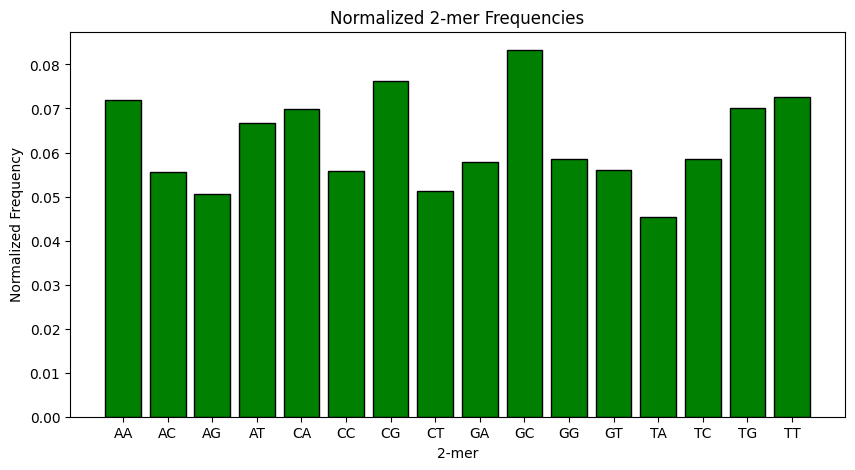

In [ ]:
fastq_file = "SRR12506197_1_sample.fastq"
sequence_data = extract_sequences_from_fastq(fastq_file)

frequencies = calculate_2mer_freq(sequence_data)
plotting_2mer_freq(frequencies)